# Take a look in the Data


Here it’s the link for retrieving the Cluster and the BCG catalog


----------------------------------------------

Data from SDSS + SPIDERS

----------------------------------------------

HOW DATA WAS CONSTRUCTED:

	1. Cluster data (from catCluster-SPIDERS_RASS_CLUS-v3.0.fits) is joined
	with BCG data (from SpidersXclusterBCGs-v2.0.fits). Some clusters are
	dropped out because no BCG data.

	2. Use astroquery to query SDSS galaxies within 2*R200c of each cluster. R200c
	estimated from Lx assuming an X-ray Luminosity --- halo mass relation.


HOW TO READ THIS DATA:

	The HDF5 files were written using the pandas python package.
	You can quickly load them and turn them into 2D numpy arrays
	using the following commands:

	*****

	import pandas as pd
	import numpy as np

	Galaxy_data  = pd.read_hdf('Data/SPIDERS_Dataset.hdf5', key = 'Galaxies').to_numpy()
	Cluster_data = pd.read_hdf('Data/SPIDERS_Dataset.hdf5', key = 'Clusters').to_numpy()


	*****

	Each of 'Galaxy_data' and 'Cluster_data' will be a 2D numpy array 
	that you can index into using slicing.

	If you leave them as pandas dataframes you can also quickly access
	an individual column and turn it into a numpy array via:

	******

	Pandas_Series = Galaxy_data  [quantity_name]
	Numpy_array   = Galaxy_data  [quantity_name].values

	
	******


NOTES:
	1. 

---------------------------------------

Cluster Catalog properties

---------------------------------------

CLUZSPEC: Spectroscopic redshift of cluster BCG


---------------------------------------

Galaxy catalog properties
---------------------------------------

CLUS_ID: The SPIDERS ID of the cluster. Can use this to join Cluster Catalog properties
	 with the Galaxy Catalog.
     
v_los: 	Line of sight velocity of galaxy (in km/s) with respect to cluster BCG.
 	Computed as v_los = c*(1/1000)*(z_gal - z_BCG])/(1 + z_BCG)

In [1]:
import matplotlib.pyplot as plt
import os

In [2]:
import pandas as pd
import numpy as np

Galaxy_data  = pd.read_hdf('../data/SPIDERS_Dataset.hdf5', key = 'Galaxies')#.to_numpy()
Cluster_data = pd.read_hdf('../data/SPIDERS_Dataset.hdf5', key = 'Clusters')#.to_numpy()


For the description of the cluster columns take a look at: <br>
https://data.sdss.org/datamodel/files/SPIDERS_ANALYSIS/catCluster-SPIDERS_RASS_CLUS.html <br>
https://data.sdss.org/datamodel/files/SPIDERS_ANALYSIS/SpidersXclusterBCGs.html


<AxesSubplot:>

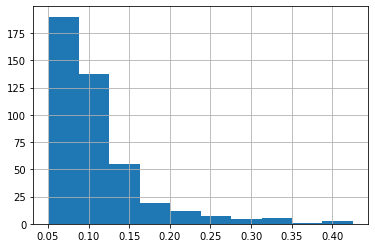

In [3]:
Cluster_data.R200C_DEG.hist()

In [4]:
Cluster_data.GAL_sdss_g_modS_C1_N

0       1.7510
1      19.9998
2       1.5593
3       6.2129
4       7.4678
        ...   
428     5.2535
429     5.6929
430     6.9246
431     4.4470
432     2.2155
Name: GAL_sdss_g_modS_C1_N, Length: 433, dtype: float32

In [5]:
list(Galaxy_data.columns)

['ra',
 'dec',
 'specobjid',
 'CLUS_ID',
 'z',
 'zErr',
 'zWarning',
 'v_los',
 'cModelMag_r',
 'cModelMagErr_r',
 'flags_r',
 'extinction_r',
 'cModelMag_g',
 'cModelMagErr_g',
 'flags_g',
 'extinction_g',
 'cModelMag_i',
 'cModelMagErr_i',
 'flags_i',
 'extinction_i',
 'cModelMag_z',
 'cModelMagErr_z',
 'flags_z',
 'extinction_z']

v_los: 	Line of sight velocity of galaxy (in km/s) with respect to cluster BCG.
 	Computed as v_los = c*(1/1000)*(z_gal - z_BCG])/(1 + z_BCG)

In [6]:
Galaxy_data

,ra,dec,specobjid,CLUS_ID,z,zErr,zWarning,v_los,cModelMag_r,cModelMagErr_r,...,flags_g,extinction_g,cModelMag_i,cModelMagErr_i,flags_i,extinction_i,cModelMag_z,cModelMagErr_z,flags_z,extinction_z
0,119.571870,53.638738,2.105547e+18,1_1172,0.136219,0.000035,0,9112.934223,17.23507,0.005641,...,2252074960060432,0.122412,16.78113,0.005188,2252074960195600,0.062929,16.46983,0.011877,2252074960060432,0.046808
1,119.864610,53.630081,2.105555e+18,1_1172,0.084383,0.000012,0,-4979.975610,16.15208,0.003694,...,2252074960191504,0.125668,15.57720,0.003265,288230651298480144,0.064603,15.61078,0.006936,2252074960195600,0.048053
2,119.796020,53.784186,2.105554e+18,1_1172,-0.000519,0.000009,0,-28062.232989,16.17832,0.004368,...,268468224,0.128670,16.15715,0.004446,285245440,0.066146,16.17055,0.007882,268468224,0.049201
3,119.660040,53.700200,2.105547e+18,1_1172,0.068184,0.000009,0,-9383.849868,16.73223,0.004984,...,2252074960060432,0.130808,16.31826,0.004628,2252074960191504,0.067245,16.03879,0.011602,2252074960060432,0.050018
4,119.649520,53.725027,2.105548e+18,1_1172,1.050130,0.000522,0,257579.003441,18.97087,0.012989,...,268468240,0.130222,19.05038,0.013508,268468240,0.066944,19.04692,0.049372,275146375184,0.049794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62627,7.037279,26.253032,7.071983e+18,2_8798,2.197458,0.000388,0,402407.963764,19.59799,0.022725,...,275146375168,0.140456,19.50224,0.030477,275146375168,0.072205,19.22245,0.123366,275280592896,0.053708
62628,6.929898,26.283447,8.624534e+18,2_8798,0.207917,0.000087,0,-34519.351615,20.19131,0.050896,...,275213484104,0.131673,19.63543,0.044110,275213615176,0.067690,19.09973,0.105809,275347701832,0.050349
62629,7.059230,26.442574,8.624547e+18,2_8798,0.323072,0.000017,0,-9229.855950,21.58912,0.131317,...,275154731264,0.128807,21.88973,0.247275,142737921,0.066217,21.17625,0.595782,18014398643716097,0.049253
62630,7.062792,26.289956,7.070677e+18,2_8798,1.162802,0.000236,4,175185.001154,21.52911,0.130061,...,275154764032,0.140669,21.11993,0.117129,45036271420080128,0.072315,19.88870,0.434835,9007199388991489,0.053789


In [7]:
len(Galaxy_data)/len(Cluster_data)

144.64665127020785

Text(0.5, 0, 'redshift')

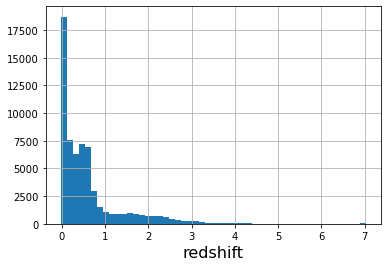

In [8]:
Galaxy_data.z.hist(bins=51)
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'redshift')

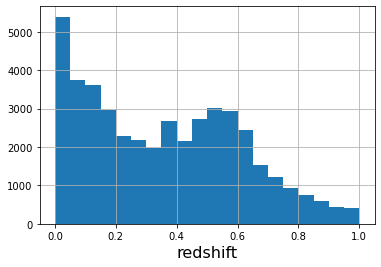

In [9]:
Galaxy_data.z.hist(bins=np.linspace(0.,1.,21))
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'redshift')

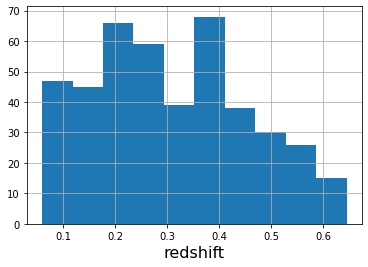

In [10]:
Cluster_data.Z_LAMBDA.hist()
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'v_los')

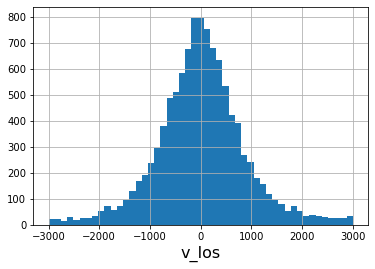

In [11]:
Galaxy_data.v_los.hist(bins=np.linspace(-3000.,3000.))
plt.xlabel('v_los',fontsize=16)

In [12]:
len(Galaxy_data)

62632

# Run BMA

### Prepare Input File

In [13]:
import h5py

In [14]:
def make_bma_input_temp_file(des,files,nsize,nchunks):
    out = dict()
    ## defining IDs
    out['mid']     = des['key']
    out['CID']     = des['key']
    out['indices'] = np.arange(0,len(des),1,dtype=np.int64)

    out['i']    = des['cModelMag_i']-des['extinction_i']
    out['ierr'] = des['cModelMagErr_i']

    out['gr']   = des['cModelMag_g']-des['cModelMag_r']-des['extinction_g']+des['extinction_r']
    out['ri']   = des['cModelMag_r']-des['cModelMag_i']-des['extinction_r']+des['extinction_i']
    out['iz']   = des['cModelMag_i']-des['cModelMag_z']-des['extinction_i']+des['extinction_z']

    out['grerr']= np.sqrt(des['cModelMagErr_g']**2+des['cModelMagErr_r']**2)
    out['rierr']= np.sqrt(des['cModelMagErr_r']**2+des['cModelMagErr_i']**2)
    out['izerr']= np.sqrt(des['cModelMagErr_i']**2+des['cModelMagErr_z']**2)

    out['redshift'] = des['z']
    write_bma_dict_temp_files(files,out,nsize,nchunks)
    return out

In [15]:
def write_bma_dict_temp_files(files,table,nsize,nchunks):
    columns = table.keys()
    idxs    = np.linspace(0,nsize,nchunks+1,dtype=np.int64)
    
    for i,file in enumerate(files):
        if os.path.isfile(file):
            os.remove(file)
        else:
            hf = h5py.File(file,'w')
            hf.create_group('bma')
            for col in columns:
                ilo,iup = idxs[i],idxs[i+1]
                hf.create_dataset('bma/%s/'%col,data=table[col][ilo:iup])
            hf.close()
    return files

In [16]:
nsize  = len(Galaxy_data)
nchunks= 100

root  = '/home/s1/jesteves/git/galaxyFormation/data/bma/'

bma_temp_input_files  = [root+'tmp/bkg_input_{:05d}.hdf5'.format(i+1) for i in range(nchunks)]
bma_temp_output_files = [root+'tmp/bkg_output_{:05d}.hdf5'.format(i+1) for i in range(nchunks)]

Galaxy_data['key'] = np.arange(0,nsize,dtype=int)
data = make_bma_input_temp_file(Galaxy_data,bma_temp_input_files,nsize,nchunks)

OSError: Unable to create file (unable to open file: name = '/home/s1/jesteves/git/galaxyFormation/data/bma/tmp/bkg_input_00001.hdf5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 602)

In [ ]:
bma_temp_input_files

### Running Code

In [17]:
from joblib import Parallel, delayed
import sys

sys.path.append('/home/s1/jesteves/git/ccopa/python/bma')
import smass

def bma_trigger(infiles,outfiles,inPath,
               nCores=2,batchStart=0,batchEnd=None,overwrite=False):
    if batchEnd is None: batchEnd = self.bma_nchunks

    batches = np.arange(batchStart,batchEnd,1,dtype=np.int64)

    print('starting parallel process')
    print('runing on the following batches:',batches)
    Parallel(n_jobs=nCores)(
        delayed(smass.calc_copa_v2)(infiles[i], outfiles[i], inPath) for i in batches)
    print('ended smass calc')

ModuleNotFoundError: No module named 'smass'

In [18]:
nCores = 71
libPath= '/data/des61.a/data/pbarchi/galaxyClusters/simha_miles_Nov2016/'
bma_trigger(bma_temp_input_files, bma_temp_output_files, libPath,
            nCores=nCores,batchStart=0,batchEnd=nchunks)

NameError: name 'bma_trigger' is not defined

In [36]:
from astropy.table import Table, vstack, join

def combine_hdf5_files(files,path='/'):
    """ Combine hdf5 files with same data structure
    """
    mylist = []
    count  = 0
    for file in files:
        if os.path.isfile(file):
            mydict = read_hdf5_file_to_dict(file,path=path)
            mylist.append(mydict)
        else:
            print('missing the temp file: %s'%(file))
            count+=1

    all_dict=stack_dict(mylist)
    return all_dict, count

In [38]:
def check_not_hf5(hf,path):
    return path not in hf.keys()

def delete_group(fname,path):
    fmaster = h5py.File(fname,'a')
    try:
        group   = fmaster[path]
    except:
        fmaster.close()
        return

    cols = group.keys()
    if len(cols)>0:
        for col in cols: del group[col]
    fmaster.close()
    
def stack_dict(in_list):
    columns = list(in_list[0].keys())
    new_dict= dict().fromkeys(columns)
    for col in columns:
        res = [mydict[col] for mydict in in_list]
        new_dict[col] = np.concatenate(res)
    return new_dict

def read_hdf5_file_to_dict(file,cols=None,indices=None,path='/'):
    hf = h5py.File(file, 'r')
    
    mygroup = hf[path]

    if cols is None: cols  = list(mygroup.keys())
    if indices is None: indices = np.arange(0,len(mygroup[cols[0]]),1,dtype=np.int64)

    mydict= dict().fromkeys(cols)
    for col in cols:
        mydict[col] = mygroup[col][:][indices]
    
    hf.close()

    return mydict


In [74]:
table, nmissing = combine_hdf5_files(bma_temp_output_files,path='bma/')
table2, nmissing = combine_hdf5_files(bma_temp_input_files,path='bma/')

t1   = Table(table)
t2   = Table(table2)
out_data = join(t1,t2,keys=['mid','CID'])
out_data.rename_column('mid','key')

In [75]:
nanmask = (np.logical_not(np.isnan(out_data['rabs'])))&(out_data['rabs']<0)

/cvmfs/des.opensciencegrid.org/fnal/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


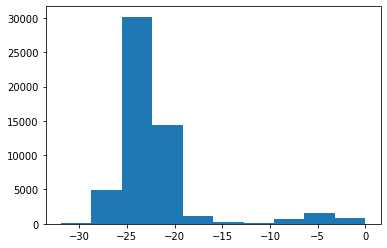

In [76]:
_ = plt.hist(out_data['rabs'][nanmask])

In [77]:
df = out_data.to_pandas()

In [78]:
df.to_hdf('../data/SPIDERS_Dataset.hdf5', 'bma', mode='a')

In [79]:
bma  = pd.read_hdf('../data/SPIDERS_Dataset.hdf5', key = 'bma')#.to_numpy()

In [80]:
Galaxy_data

,ra,dec,specobjid,CLUS_ID,z,zErr,zWarning,v_los,cModelMag_r,cModelMagErr_r,...,extinction_g,cModelMag_i,cModelMagErr_i,flags_i,extinction_i,cModelMag_z,cModelMagErr_z,flags_z,extinction_z,key
0,119.571870,53.638738,2.105547e+18,1_1172,0.136219,0.000035,0,9112.934223,17.23507,0.005641,...,0.122412,16.78113,0.005188,2252074960195600,0.062929,16.46983,0.011877,2252074960060432,0.046808,0
1,119.864610,53.630081,2.105555e+18,1_1172,0.084383,0.000012,0,-4979.975610,16.15208,0.003694,...,0.125668,15.57720,0.003265,288230651298480144,0.064603,15.61078,0.006936,2252074960195600,0.048053,1
2,119.796020,53.784186,2.105554e+18,1_1172,-0.000519,0.000009,0,-28062.232989,16.17832,0.004368,...,0.128670,16.15715,0.004446,285245440,0.066146,16.17055,0.007882,268468224,0.049201,2
3,119.660040,53.700200,2.105547e+18,1_1172,0.068184,0.000009,0,-9383.849868,16.73223,0.004984,...,0.130808,16.31826,0.004628,2252074960191504,0.067245,16.03879,0.011602,2252074960060432,0.050018,3
4,119.649520,53.725027,2.105548e+18,1_1172,1.050130,0.000522,0,257579.003441,18.97087,0.012989,...,0.130222,19.05038,0.013508,268468240,0.066944,19.04692,0.049372,275146375184,0.049794,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62627,7.037279,26.253032,7.071983e+18,2_8798,2.197458,0.000388,0,402407.963764,19.59799,0.022725,...,0.140456,19.50224,0.030477,275146375168,0.072205,19.22245,0.123366,275280592896,0.053708,62627
62628,6.929898,26.283447,8.624534e+18,2_8798,0.207917,0.000087,0,-34519.351615,20.19131,0.050896,...,0.131673,19.63543,0.044110,275213615176,0.067690,19.09973,0.105809,275347701832,0.050349,62628
62629,7.059230,26.442574,8.624547e+18,2_8798,0.323072,0.000017,0,-9229.855950,21.58912,0.131317,...,0.128807,21.88973,0.247275,142737921,0.066217,21.17625,0.595782,18014398643716097,0.049253,62629
62630,7.062792,26.289956,7.070677e+18,2_8798,1.162802,0.000236,4,175185.001154,21.52911,0.130061,...,0.140669,21.11993,0.117129,45036271420080128,0.072315,19.88870,0.434835,9007199388991489,0.053789,62630


In [81]:
result = pd.merge(Galaxy_data, bma)

In [83]:
result['rabs']

0       -22.081061
1       -22.348194
2              NaN
3       -20.852680
4       -25.200070
           ...    
62627   -26.732325
62628   -20.354563
62629   -19.261566
62630   -24.840976
62631   -24.050249
Name: rabs, Length: 62632, dtype: float64